1) Milk.txt is a time series of monthly milk production per cow with values from 01/1962 to 12/1975. Separate the data into two parts: a time series from 01/1962 to 12/1973 and another time series from 01/1974 to 12/1975. Perform the decomposition of the first part using STL decomposition and show the graphics. After that, predict the production for the years 1974 to 1975 using the seasonality component of the STL and the autoregressive (AR) model to predict the trend + residual components. Show the graphics of actual values and predicted values. Calculate the MSE of the prediction. Comment your solution. In Python, the following functions can be used:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg
In Matlab, the functions trenddecomp and arima can be used.

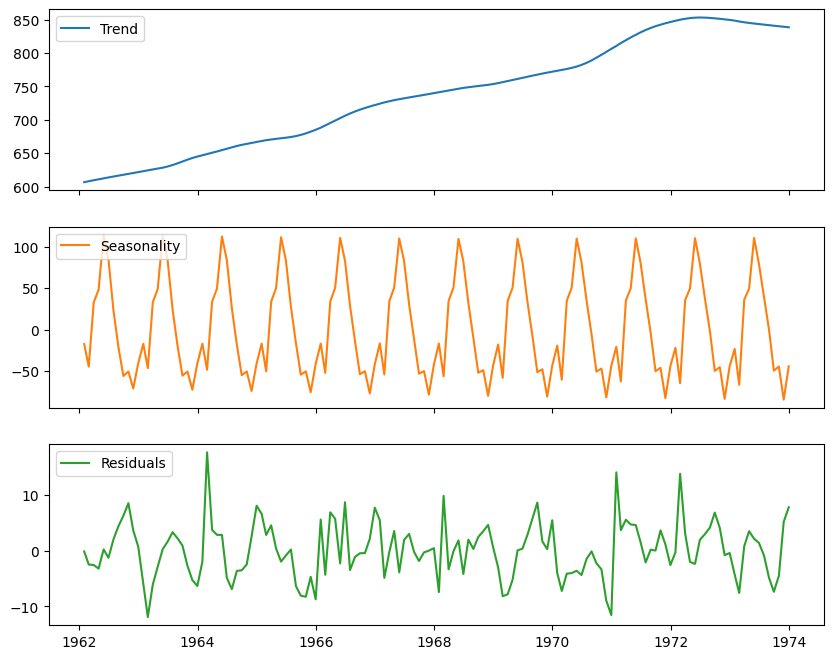

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Aquisição de dados
data = pd.read_csv('milk.txt', header=None)

ts = pd.Series(data[0].values, index=pd.date_range("1-1962", periods=len(data), freq="ME"))

# Separação dos conjuntos de treino e teste
ts_train = ts[:"1973-12"]
ts_test = ts["1974-01":]

# Decomposição STL
stl = STL(ts_train, seasonal=13)
result = stl.fit()

# Plotando a decomposição
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axes[0].plot(result.trend, label='Trend', color='tab:blue')
axes[0].legend(loc='upper left')
axes[1].plot(result.seasonal, label='Seasonality', color='tab:orange')
axes[1].legend(loc='upper left')
axes[2].plot(result.resid, label='Residuals', color='tab:green')
axes[2].legend(loc='upper left')
plt.show()

###################### Parei aqui ##############################################

In [ ]:

# Modelo Autorregressivo (AR) para previsão da tendência + resíduos
train_residual_trend = result.trend + result.resid
ar_model = AutoReg(train_residual_trend.dropna(), lags=12).fit()

ts_pred_trend_resid = ar_model.predict(start=len(train_residual_trend), end=len(train_residual_trend) + len(ts_test) - 1)

# Reconstituindo a previsão final
seasonal_test = result.seasonal[-12:].values  # Último ano de sazonalidade
seasonal_forecast = np.tile(seasonal_test, len(ts_test) // 12)
ts_pred = ts_pred_trend_resid.values + seasonal_forecast

# Avaliação do modelo
mse = mean_squared_error(ts_test, ts_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Plotando valores reais e previstos
plt.figure(figsize=(10, 5))
plt.plot(ts_test.index, ts_test, label="Actual", color="blue")
plt.plot(ts_test.index, ts_pred, label="Predicted", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("Milk Production")
plt.title("Milk Production Prediction (1974-1975)")
plt.legend()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1522138669.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts1 = pd.Series(data1, index=pd.date_range("1-1962", periods=len(data1), freq="M"), name="Milks volume 62-73")
C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1522138669.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts2 = pd.Series(data2, index=pd.date_range("1-1974", periods=len(data2), freq="M"), name="Milks volume 74-75")
C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1522138669.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts3 = pd.Series(data3, index=pd.date_range("1-1962", periods=len(data3), freq="M"), name="Milks volume 62-75")
C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1522138669.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

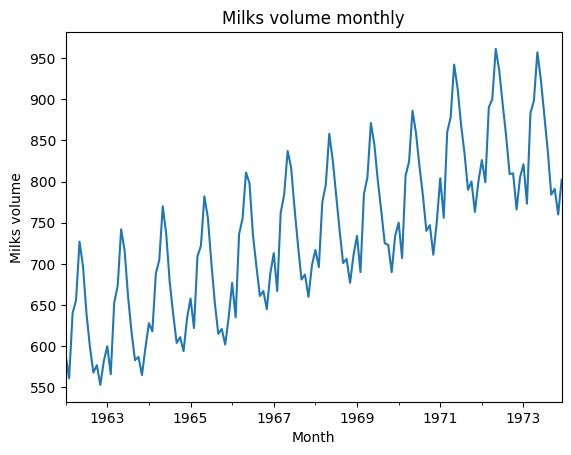

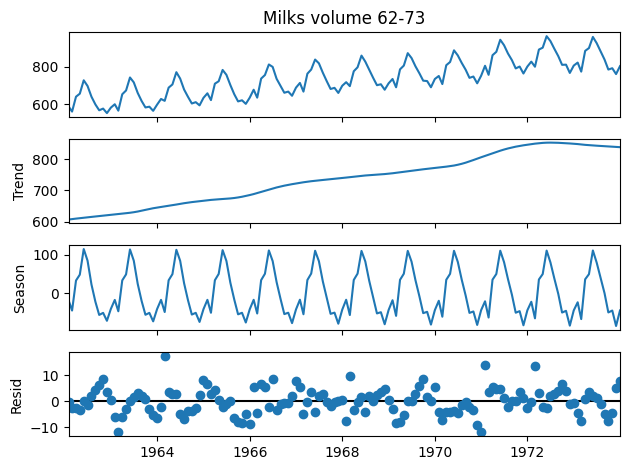

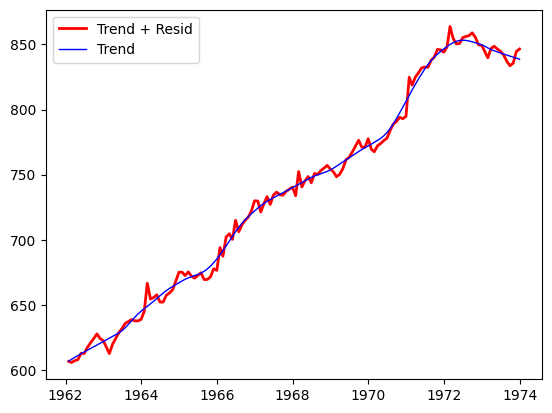

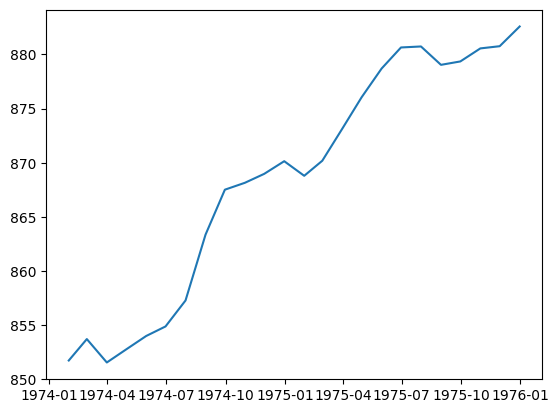

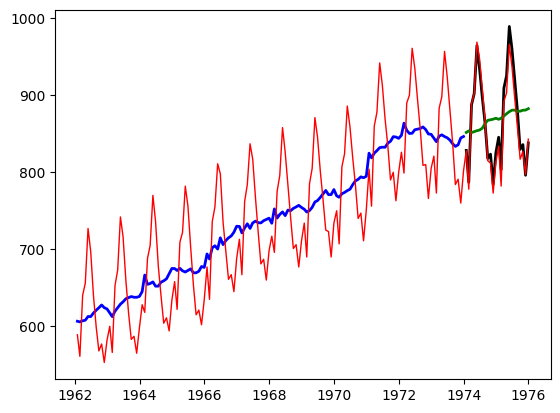

1974-01-31    851.725094
1974-02-28    853.705152
1974-03-31    851.543055
1974-04-30    852.751312
1974-05-31    853.989720
1974-06-30    854.872139
1974-07-31    857.270917
1974-08-31    863.350513
1974-09-30    867.506879
1974-10-31    868.142677
1974-11-30    868.969514
1974-12-31    870.137398
1975-01-31    868.789545
1975-02-28    870.179957
1975-03-31    873.141006
1975-04-30    876.047122
1975-05-31    878.700225
1975-06-30    880.645408
1975-07-31    880.737308
1975-08-31    879.039850
1975-09-30    879.354172
1975-10-31    880.557929
1975-11-30    880.761633
1975-12-31    882.584176
Freq: ME, dtype: float64
191.286630247982


C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1522138669.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = b+pow((pdt[i-144]+C[i-144]-ts3[i]),2)


In [3]:
#aquisiçao de dados
data1 = pd.read_csv('milk.txt',index_col=False, header=None)
data1 = [data1.iloc[i, 0] for i in range(144)]
data2 = pd.read_csv('milk.txt',index_col=False, header=None)
data2 = [data2.iloc[i, 0] for i in range(144,168)]

ts1 = pd.Series(data1, index=pd.date_range("1-1962", periods=len(data1), freq="M"), name="Milks volume 62-73")
ts2 = pd.Series(data2, index=pd.date_range("1-1974", periods=len(data2), freq="M"), name="Milks volume 74-75")

data3 = pd.read_csv('milk.txt',index_col=False, header=None)
data3 = [data3.iloc[i, 0] for i in range(168)]
ts3 = pd.Series(data3, index=pd.date_range("1-1962", periods=len(data3), freq="M"), name="Milks volume 62-75")


fig1 = ts1.plot()
plt.xlabel('Month')
plt.ylabel('Milks volume')
plt.title('Milks volume monthly')
#plt.show()                                  #exibir plotagem de gráfico
#plt.savefig('Milks volume monthly.png')

#STL decomposition
stl = STL(ts1, seasonal=13) #period=12
STL_decomp = stl.fit()
fig2 = STL_decomp.plot()

A = STL_decomp.trend + STL_decomp.resid

fig3 = plt.figure("Figure 3")
plt.plot(A, c="red", lw=2)
plt.plot(STL_decomp.trend, c="blue", lw=1)
plt.legend(['Trend + Resid', 'Trend'])


model = AutoReg(A,lags=24)
model_fit = model.fit()
pdt = model_fit.predict(start="1-1-1974",end="31-12-1975")
fig4 = plt.figure("Figure 4")
plt.plot(pdt)

B = STL_decomp.seasonal
C = np.zeros(24)
for i in range(12):
    C[i] = B[i+132]
    C[i+12] = B[i+132] 

fig5 = plt.figure("Figure 5")
plt.plot(pdt+C,c="black",lw=2)
plt.plot(A,c="blue",lw=2)
plt.plot(pdt,c="green",lw=2)
plt.plot(ts3,c="red",lw=1)
plt.show()
print(pdt)


b=0
for i in range(144,168):
    b = b+pow((pdt[i-144]+C[i-144]-ts3[i]),2)
mse = b/24
print(mse)